**Predicting California house prices using Linear Regression**

---



Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Dataset import and Description

In [45]:
dataset = fetch_california_housing()

X = dataset.data
y = dataset.target

df = pd.DataFrame(X, columns=dataset.feature_names)
df["Target"] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Data Preprocessing

In [46]:
# Train-Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Adding a bias (column of ones) to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

Model Implementation

In [47]:
# Initialising weights
n_features = X_train.shape[1]
weights = np.zeros(n_features)    # w0, w1, w2...

# Prediction
def predict(X, weights):
    return np.dot(X, weights)

# Mean Squared Error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent step
def gradient_descent_step(X, y_true, weights, learning_rate):
  n = len(y)
  y_pred = predict(X, weights)
  gradient = -(2/n) * np.dot(X.T, (y_true - y_pred))  #derivative of MSE
  weights = weights - learning_rate * gradient
  return weights

Training the Model

Epoch 0, Training MSE: 5.4706
Epoch 100, Training MSE: 0.8204
Epoch 200, Training MSE: 0.6116
Epoch 300, Training MSE: 0.5848
Epoch 400, Training MSE: 0.5697
Epoch 500, Training MSE: 0.5583
Epoch 600, Training MSE: 0.5495
Epoch 700, Training MSE: 0.5426
Epoch 800, Training MSE: 0.5373
Epoch 900, Training MSE: 0.5331


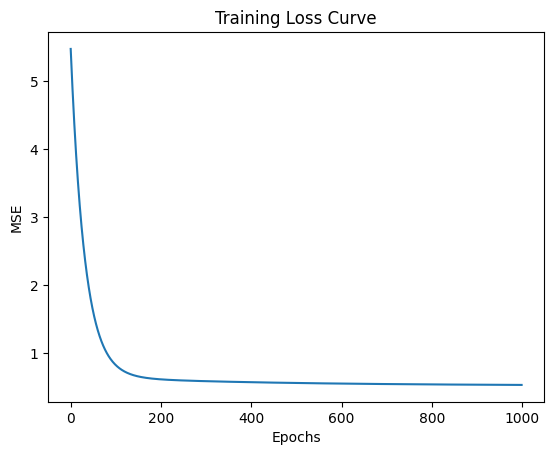

In [48]:
learning_rate = 0.01
epochs = 1000  # number of iterations
train_losses = []

for i in range(epochs):
  weights = gradient_descent_step(X_train, y_train, weights, learning_rate)
  y_pred = predict(X_train, weights)
  loss = mse(y_train, y_pred)
  train_losses.append(loss)

  if i % 100 == 0:
    print(f"Epoch {i}, Training MSE: {loss:.4f}")


# Plot the training loss

plt.plot(range(epochs), train_losses)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

Evaluation on Test Data




Final Test MSE: 0.5564
R² Score: 0.5754


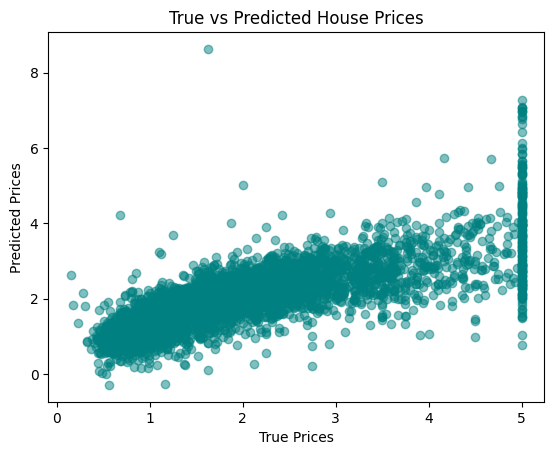

In [50]:
# Predictions
y_test_pred = predict(X_test, weights)

# Evaluation Metrics
test_loss = mse(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"\nFinal Test MSE: {test_loss:.4f}")
print(f"R² Score: {r2:.4f}")

# True vs Predicted plot
plt.scatter(y_test, y_test_pred, alpha=0.5, color="teal")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted House Prices")
plt.show()